# Tutorial on image moments in scikit-image

Read on for some brief technical background on what image moments are,
followed by some practical notes on how to calculate and interpret the
different kinds of moments available in the scikit-image package.

## Introduction to image moments

The moments of a shape are particular weighted averages (in statistics, "moments")
of the pixel intensities. In physics they're the distribution of matter about
a point or an axis etc.

They are usually described as a function $f(x,y)$ which can be read as
_the value (or intensity) of the pixel in an image at position $(x,y)$_, where $f$ is the 'image function' (or sometimes $I$).

If the image is binary (e.g. a binary blob), then we'd say $f$ takes
values in $[0,1]$.

A moment of order $p + q$ is defined for a 2D continuous function on a region as:

$$M_{pq} = \int x^p y^q\hspace{2pt}f(x,y) \cdot dx\hspace{2pt}dy$$

Usually we work with discrete (not continuous) image functions (as images
are usually made of discrete pixels), which conveniently means the integrals
simplify to summations over x and y.

$$M_{pq} = \sum_x \sum_y x^p y^q\hspace{2pt}f(x,y)$$

So the steps to obtain a moment $M_{pq}$ are:

- count the pixels over an image $f(x,y)$,
- scale this count by a power of $x$ and/or $y$ ($p$ and/or $q$)
- the sum of these powers $p+q$ is the moment's _order_

### Zeroth order moments

Since the only values of $(p, q)$ that sum to 0 are $(0, 0)$, there is only one $0^{th}$ order moment: $M_{00}$

$$M_{00} = \sum_x \sum_y x^0 y^0\hspace{2pt}f(x,y)$$

These coefficients $x^0 = y^0 = 1$, so they can be removed:

$$M_{00} = \sum_x \sum_y f(x,y)$$

The $0^{th}$ moment is just the total count
of pixels in an image, i.e. its area (it's usually called the area moment for binary
images or otherwise the 'mass' of the image for grayscale etc.).

### First order moments

By _"first order moments"_ we mean $M_{10}$, $M_{01}$

$$M_{10} = \sum_x \sum_y x \hspace{2pt}f(x,y) \hspace{10pt}and\hspace{10pt}M_{01} = \sum_x \sum_y y \hspace{2pt}f(x,y)$$


### Second order moments

By _"second order moments"_ we mean $M_{11}$, $M_{20}$, $M_{02}$

$$M_{11} = \sum_x \sum_y xy\hspace{2pt}f(x,y) \hspace{10pt},\hspace{10pt}M_{20} = \sum_x \sum_y x^2 \hspace{2pt}f(x,y) \hspace{10pt},\hspace{10pt}M_{02} = \sum_x \sum_y y^2 \hspace{2pt}f(x,y)$$


Second order moments $M_{20}$ and $M_{02}$ describe the "distribution of mass"
of the image with respect to the coordinate axes. In mechanics they're the
_moments of inertia_.

Another mechanical quality is the _radius of gyration_
with respect to an axis, expressed as 

$$\sqrt{\frac{M_{20}}{M_{00}}} \hspace{10pt}and\hspace{10pt} \sqrt{\frac{M_{02}}{M_{00}}}$$

There are others: scale invariant moments and rotation invariant moments
(the latter are a.k.a. Hu moments).

Next let's run through moment calculation in `scikit-image`.

## Image moments in scikit-image

To calculate image moments, scikit-image provides `skimage.measure.moments`.

Firstly, I'll calculate the moments for a small circular binary blob.

In [1]:
from skimage.measure import moments
from skimage.draw import disk
import numpy as np

In [2]:
shape = (9,9)
rr, cc = disk(center=(4,4), radius=4, shape=None)

In [3]:
img = np.zeros(shape=shape, dtype=np.uint8)
img[rr, cc] = 1
img

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

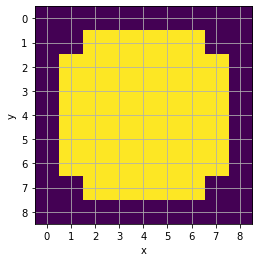

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.imshow(img)

By adding unit grid lines to the plot, the area of the disk can be counted simply by counting the number of grid intersections (each of which is the centre point of a disk pixel).

- The first and last row (at y=1 and y=6) has 5 of these intersecting gridlines,
- The 2nd-6th rows each have 7,
- ...so the total is (5 x 2)+(7 x 5) = 45

So I'd expect the first image moment (the "mass") to be 45, which it is:

In [5]:
m00 = moments(img, order=0)
m00

array([[45.]])

In practice you wouldn't calculate just one moment at a time like this, you'd calculate all up to a particular order.

By default in scikit-image this order is 3, but here I only want up to the 2nd order.

In [6]:
moments_array = moments(img, order=2)
print(moments_array)

[[   45.   180.   880.]
 [  180.   720.  3520.]
 [  880.  3520. 17100.]]


Note that this array of moments is symmetrical: the reason why is self-evident (the image of the circular disk is symmetrical about the x and y axes which are the basis for the value of the moments as introduced earlier).

To move away from this, let's change our image.

- Also note that all the moments are multiples of the $M_{00}$ ($0^{th}$ order moment)

---

[The source code](https://github.com/scikit-image/scikit-image/blob/main/skimage/measure/_moments.py#L196-L255) contains another example, but again it's symmetrical (the image is a small square), but with a little editing it can be made to look more like a wonky Tetris block (or maybe a low poly cow).

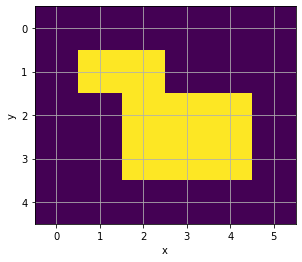

In [7]:
cow = np.zeros((5, 6), dtype=np.uint8)
cow[1:2, 1:3] = 1 # "head" of the cow
cow[2:4, 2:5] = 1 # "body" of the cow
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlabel("x"); plt.ylabel("y"); plt.grid()
plt.imshow(cow)

In [8]:
moments(cow, order=2).astype(np.uint8)

array([[  8,  21,  63],
       [ 17,  48, 150],
       [ 41, 120, 126]], dtype=uint8)

Now the array of moments is no longer symmetrical, and the values are no longer simply multiples of the $0^{th}$ order moment.

- The values of interest are along the antidiagonals from the top-left of the array
- If we want at most the $2^{nd}$ order moments, then these are the values along the
  main antidiagonal of the array

To write out all the equations shown in this array:

$$0^{th} order:$$

$$M_{00} = \sum_x \sum_y f(x,y) = 8$$

$$1^{st} order:$$

$$M_{10} = \sum_x \sum_y x \hspace{2pt}f(x,y) = 21$$
$$M_{01} = \sum_x \sum_y y \hspace{2pt}f(x,y) = 17$$

$$2^{nd} order:$$

$$M_{20} = \sum_x \sum_y x^2 \hspace{2pt}f(x,y) = 63$$
$$M_{11} = \sum_x \sum_y xy\hspace{2pt}f(x,y) = 48$$
$$M_{02} = \sum_x \sum_y y^2 \hspace{2pt}f(x,y) = 41$$

By manual calculation (looking at the "cow" image), these values can be verified visually to show that the array is in the format:

$$\begin{bmatrix}
M_{00} & M_{10} & M_{20}\\
M_{01} & M_{11} & M_{21}\\
M_{02} & M_{12} & M_{22}
\end{bmatrix}$$

In plain English: the value of $p$ increments along the columns of the array (left to right), and the value of $q$ increments down the rows of the array (top to bottom).

So the moments of interest (only up to 2nd order) can be extracted as:

In [9]:
(M_00, M_10, M_20), (M_01, M_11, _), (M_02, *_) = moments(cow, order=2).astype(np.uint8)

To step through a couple of examples:

### $M_{01}$

- The "head" on row 1 has 2 pixels
- The "body" on rows 2 and 3 has 3 pixels on each row
- $M_{01} = 2(1) + 3(2) + 3(3) = 2 + 6 + 9 = 17$

### $M_{20}$

- Column 1 has only a "head" pixel
- Column 2 has both a "head" pixel and 2 "body" pixels
- Columns 3 and 4 have only the 2 "body" pixels each
- $M_{20} = 1^2(1) + 2^2(3) + 3^2(2) + 4^2(2) = 1 + 12 + 18 + 32 = 63$

## Central moments

Image moments are sensitive to position, but by subtracting the average x
and y position in the above equation we can obtain a translation-invariant
"central moment".

$$μ_pq = \int {(x-\bar{x})}^p {(y-\bar{y})}^q f(x,y) dx dy$$

where

$$\bar{x} = \frac{M_{10}}{M_{00}} \hspace{10pt}and\hspace{10pt} \bar{y} = \frac{M_{01}}{M_{00}}$$

Meaning first order x or y moment divided by the area moment

- $(\bar{x},\bar{y})$ is the centroid (a.k.a. centre of gravity)

So far so simple.

## Orientation information from image moments

The covariance matrix of an image can be obtained from second order central moments as below
(credit: [Wikipedia](https://en.wikipedia.org/wiki/Image_moment#Examples_2))

$$\mu^\prime_{20} = \frac{\mu_{20}}{\mu_{00}} = \frac{M_{20}}{M_{00}} - \bar{x}^2 $$

$$\mu^\prime_{02} = \frac{\mu_{02}}{\mu_{00}} = \frac{M_{02}}{M_{00}} - \bar{y}^2 $$

$$\mu^\prime_{11} = \frac{\mu_{11}}{\mu_{00}} = \frac{M_{11}}{M_{00}} - \bar{x}\bar{y} $$

The covariance matrix of the image $I(x,y)$ is then:

$$cov[I(x,y)] = \begin{bmatrix}
\mu^\prime_{20} &\mu^\prime_{11}\\
\mu^\prime_{02} &\mu^\prime_{11}
\end{bmatrix}$$

> The eigenvectors of this matrix correspond to the major and minor axes of the
> image intensity, so the **orientation** can thus be extracted from the angle
> of the eigenvector associated with the largest eigenvalue towards the axis
> closest to this eigenvector...

- See [this article](https://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/)
  for a nice geometric interpretation of covariance, which makes this usage intuitive

### Telling the time with orientation information from image moments

Realistically you'd want to use the orientation information for obtaining
angles in your image without a reference direction.

Here though, just for fun, let's use image moments to find the orientation
of the image of a "clock" (so we could tell the time). For simplicity, let's
pretend clocks just have one hand!

We'll set up an image like the disk at the start, but "cut out" a smaller
disk, and add hands using `skimage.draw.line`:

In [53]:
from skimage.draw import circle_perimeter, line
from numpy import sin, cos, pi
import numpy as np

def hour_hand(centre, hand_length, hour=12):
    r, c = centre
    # "Rotate 180 degrees" by adding 6 because y axis is inverted
    hour -= 6
    if not 1 <= hour <= 12:
        hour %= 12
    day_progress = hour % 12 / 12
    hand_angle = day_progress * 2 * pi
    hand_end = (
        r + np.round(hand_length * cos(hand_angle)).astype(int),
        c - np.round(hand_length * sin(hand_angle)).astype(int)
    )
    print(f"{hand_angle=:.2f} radians (internal angle representation)")
    clock_hand_angle = ((hand_angle + pi) % (2*pi)) / (2*pi) * 360
    print(f"{clock_hand_angle=:.2f}° (clock hand angle from 'top')")
    return line(*centre, *hand_end)

def draw_clock(size=19, hour=12, edged=True):
    shape=(size,size)
    r = c = size // 2
    radius = r-1
    rr, cc = circle_perimeter(r, c, radius=radius, shape=None)
    hour_rr, hour_cc = hour_hand(centre=(r,c), hand_length=radius-2, hour=hour)
    clock = np.zeros(shape=shape, dtype=np.uint8)
    clock[rr, cc] = int(edged)
    clock[hour_rr, hour_cc] = 1
    return clock

clock = draw_clock()
clock

hand_angle=3.14 radians (internal angle representation)
clock_hand_angle=0.00° (clock hand angle from 'top')


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0,

By default that drew the face at 12 o'clock, with the hour hand going straight up,
and here's 7 o'clock:

In [54]:
from ipywidgets import interact

@interact(size=(5,200), h_val=(1,12))
def plot_clock(size=15, h_val=7, edged=True):
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(10))
    plt.xlabel("x")
    plt.ylabel("y")
    o_clock = draw_clock(size=size, hour=h_val, edged=edged)
    plt.imshow(o_clock)

interactive(children=(IntSlider(value=15, description='size', max=200, min=5), IntSlider(value=7, description=…

The orientation is printed out above the clock... but now imagine this is just an
image of a clock you came across (rather than programmed), and you want to assess
its orientation using image moments.

You can do so with the machinery introduced above. Recall:

The covariance matrix of the image $I(x,y)$ is then:

$$cov[I(x,y)] = \begin{bmatrix}
\mu^\prime_{20} &\mu^\prime_{11}\\
\mu^\prime_{02} &\mu^\prime_{11}
\end{bmatrix}$$

In [23]:
from skimage.measure import moments_central
seven_o_clock = draw_clock(size=15, hour=7)
c7_central_moments = moments_central(seven_o_clock, order=2).astype(int)
print(c7_central_moments)

hand_angle=0.52 radians (internal angle representation)
clock_hand_angle=210.00° (clock hand angle from 'top')
[[  36    0  585]
 [   0   -8  -84]
 [ 593   45 4319]]


In [24]:
(mu_00, mu_10, mu_20), (mu_01, mu_11, _), (mu_02, *_) = c7_central_moments
c7_cov = np.array([[mu_20, mu_11],[mu_02, mu_11]])
print(c7_cov)

[[585  -8]
 [593  -8]]


To get the orientation, we need the principle eigenvector, which we get
from PCA using the Singular Value Decomposition (SVD).

In [46]:
svd_u, *_ = np.linalg.svd(c7_cov)
print(svd_u[:, 0])

[-0.70228939 -0.71189157]


Collecting these steps into a function for reuse:

In [50]:
def extract_orientation(clock):
    central_moments = moments_central(clock, order=2).astype(int)
    (mu_00, mu_10, mu_20), (mu_01, mu_11, _), (mu_02, *_) = central_moments
    cov = np.array([[mu_20, mu_11],[mu_02, mu_11]])
    svd_u, *_ = np.linalg.svd(cov)
    return svd_u[:, 0]

In [56]:
@interact(size=(5,200), h_val=(1,12))
def plot_clock(size=15, h_val=7, edged=True):
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(10))
    plt.xlabel("x")
    plt.ylabel("y")
    o_clock = draw_clock(size=size, hour=h_val, edged=edged)
    orient = extract_orientation(o_clock)
    print(f"{orient=}")
    plt.imshow(o_clock)

interactive(children=(IntSlider(value=15, description='size', max=200, min=5), IntSlider(value=7, description=…

The interpretation of this angle is somewhat subjective to the application, but
if you untick the checkbox and draw only the hour hand of the clock you'll see:

- the values at 3 and 9 are the same
- the values at 3 (or 9) and 6 (or 12) are orthogonal

## Further info

The moments above are all _geometric moments_ since the polynomial basis
is a standard power basis $x^p$ multiplied by $y^q$.

If you want to read more, check out
Flusser et al's book _Moments and Moment Invariants in Pattern Recognition_